In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

# File to Load (Remember to change these)
city_data_to_load = "C:/Users/karsa_000/Desktop/MAT/data/city_data.csv"
ride_data_to_load = "C:/Users/karsa_000/Desktop/MAT/data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride= pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urban_type = city_ride[city_ride["type"] == "Urban"].groupby([city_ride["city"]])
suburban_type = city_ride[city_ride["type"] == "Suburban"].groupby([city_ride["city"]])
rural_type = city_ride[city_ride["type"] == "Rural"].groupby([city_ride["city"]])

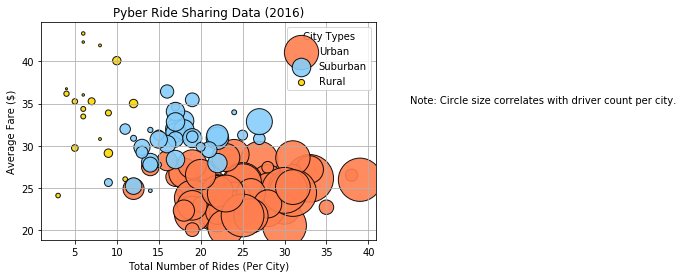

In [3]:
# Obtain the x and y coordinates for each of the three city types
Xurb = urban_type["ride_id"].count()
Xsurb = suburban_type["ride_id"].count()
Xrur = rural_type["ride_id"].count()
Yurb = urban_type["fare"].mean()
Ysurb = suburban_type["fare"].mean()
Yrur = rural_type["fare"].mean()
Zurb = urban_type["driver_count"].sum()
Zsurb = suburban_type["driver_count"].sum()
Zrur = rural_type["driver_count"].sum()

# Build the scatter plots for each city types
plt.scatter(Xurb, Yurb, Zurb, label = "Urban", color=["coral"], edgecolor="black", alpha = 0.90, marker="o")
plt.scatter(Xsurb, Ysurb, Zsurb, label = "Suburban", color=["lightskyblue"], edgecolor="black", alpha = 0.90, marker="o")
plt.scatter(Xrur, Yrur, Zrur, label = "Rural", color=["gold"], edgecolor="black", alpha = 0.90, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
plt.legend(title= "City Types", loc= "best", fontsize=10)

# Incorporate a text label regarding circle size
plt.text(45, 35, "Note: Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("C:/Users/karsa_000/Desktop/MAT/pyber.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

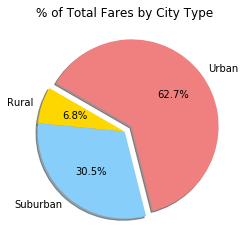

In [5]:
# Calculate Type Percents
totfare= city_ride.groupby('type')['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(totfare, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("C:/Users/karsa_000/Desktop/MAT/totfare.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

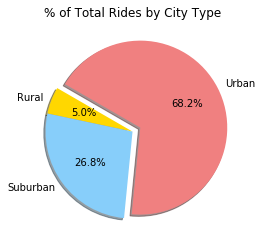

In [11]:
# Calculate Ride Percents
totrides= city_ride.groupby('type')['ride_id'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(totrides, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("C:/Users/karsa_000/Desktop/MAT/totrides.png")

In [12]:
# Show Figure
plt.show()

## Total Drivers by City Type

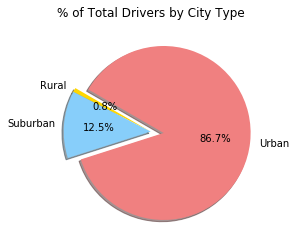

In [19]:
# Calculate Driver Percents
totDR= city_ride.groupby('type')['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.15)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(totDR, explode=explode, labels= labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("C:/Users/karsa_000/Desktop/MAT/totDR.png")

In [14]:
# Show Figure
plt.show()